# Pre Processsing

In [51]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from pathlib import Path
import os
def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data
def butter_lowpass(cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass_filter(data, cutoff_freq, fs, order=5):
    b, a = butter_lowpass(cutoff_freq, fs, order=order)
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data
def segment_data(data, window_size, overlap):
    segments = []
    for i in range(0, len(data) - window_size + 1, overlap):
        segment = data[i:i + window_size]
        segments.append(segment)
    return segments
def preprocessing(acc,gyro,id):
    acc_df=pd.read_csv(acc,header=None)
    gyr_df=pd.read_csv(gyro,header=None)
    acc_df[5]=gyr_df[2]
    acc_df[6]=gyr_df[3]
    acc_df[7]=gyr_df[4]
    acc_df.columns=['timestamp','duration','AX','AY','AZ','GX','GY','GZ']
    accel_data = acc_df[['AX', 'AY', 'AZ']].values
    gyro_data = acc_df[['GX', 'GY', 'GZ']].values
    acc_df['label']=0
    acc_df['personid']=id
    normalized_accel_data = normalize(accel_data)
    normalized_gyro_data = normalize(gyro_data)
    cutoff_freq = 5  
    fs = 50  
    order = 4
    filtered_accel_data = apply_lowpass_filter(normalized_accel_data, cutoff_freq, fs, order)
    filtered_gyro_data = apply_lowpass_filter(normalized_gyro_data, cutoff_freq, fs, order)
    acc_df[['AX','AY','AZ']]=filtered_accel_data
    acc_df[['GX','GY','GZ']]=filtered_gyro_data
    window_size = 40 
    overlap=40
    segmented_data_0 = segment_data(acc_df[['AX','AY','AZ','GX','GY','GZ','label','personid']].values, window_size, overlap)
    return segmented_data_0

# Importing and treating data

In [52]:
data=[]

for i in range(1,5):
    file_a="New Data//1//WL//1_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//1//WL//1_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,1)
    data.extend(data1)
for i in range(1,5):
    file_a="New Data//1//WR//1_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//1//WR//1_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,1)
    data.extend(data1)
for i in range(1,5):
    file_a="New Data//2//WL//2_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//2//WL//2_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,2)
    data.extend(data1)
for i in range(1,5):
    file_a="New Data//2//WR//2_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//2//WR//2_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,2)
    data.extend(data1)
for i in range(1,5):
    file_a="New Data//3//WL//3_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//3//WL//3_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,3)
    data.extend(data1)
for i in range(1,5):
    file_a="New Data//3//WR//3_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//3//WR//3_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,3)
    data.extend(data1)
for i in range(1,5):
    file_a="New Data//4//WL//4_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//4//WL//4_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,4)
    data.extend(data1)
for i in range(1,5):
    file_a="New Data//4//WR//4_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//4//WR//4_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,4)
    data.extend(data1)
X=[array[:, 0:7] for array in data]

Y=[array[:,7:] for array in data]

flattened_data = [array.flatten() for array in X]
X = np.array(flattened_data)
labels=[]
for i in range(0,np.shape(X)[0]):
    arr=Y[i][39:,0:]
    labels.append(arr[0,0])


# Importing and treating the test data

In [53]:
testdata=[]

for i in range(4,5):
    file_a="New Data//1//WL//1_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//1//WL//1_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,1)
    testdata.extend(data1)
for i in range(4,5):
    file_a="New Data//1//WR//1_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//1//WR//1_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,1)
    testdata.extend(data1)
for i in range(4,5):
    file_a="New Data//2//WL//2_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//2//WL//2_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,2)
    testdata.extend(data1)
for i in range(4,5):
    file_a="New Data//2//WR//2_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//2//WR//2_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,2)
    testdata.extend(data1)
for i in range(4,5):
    file_a="New Data//3//WL//3_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//3//WL//3_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,3)
    testdata.extend(data1)
for i in range(4,5):
    file_a="New Data//3//WR//3_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//3//WR//3_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,3)
    testdata.extend(data1)
for i in range(4,5):
    file_a="New Data//4//WL//4_wl"+str(i)+" Accelerometer.txt"
    file_g="New Data//4//WL//4_wl"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,4)
    testdata.extend(data1)
for i in range(4,5):
    file_a="New Data//4//WR//4_wr"+str(i)+" Accelerometer.txt"
    file_g="New Data//4//WR//4_wr"+str(i)+" Gyroscope.txt"
    data1=preprocessing(file_a,file_g,4)
    testdata.extend(data1)
X_test=[array[:, 0:7] for array in testdata]
Y_test=[array[:,7:] for array in testdata]
flattened_data = [array.flatten() for array in X_test]

# Convert the list of flattened arrays into a numpy array
X_test = np.array(flattened_data)

testlabels=[]
for i in range(0,np.shape(X_test)[0]):
    arr=Y_test[i][39:,0:]
    testlabels.append(arr[0,0])

# Training SVM model

In [54]:
from sklearn import svm

clf = svm.SVC(probability=True,kernel='rbf')
clf.fit(X, labels)

SVC(probability=True)

# Testing the SVM model

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = clf.predict(X_test)
accuracy = accuracy_score(testlabels, y_pred)
print(confusion_matrix(testlabels,y_pred))
print("Accuracy:", accuracy)

[[149  12  47  19]
 [  4 184   2  40]
 [  4   4 146  19]
 [ 21   6  31 145]]
Accuracy: 0.7490996398559424


# Plotting FAR vs FRR

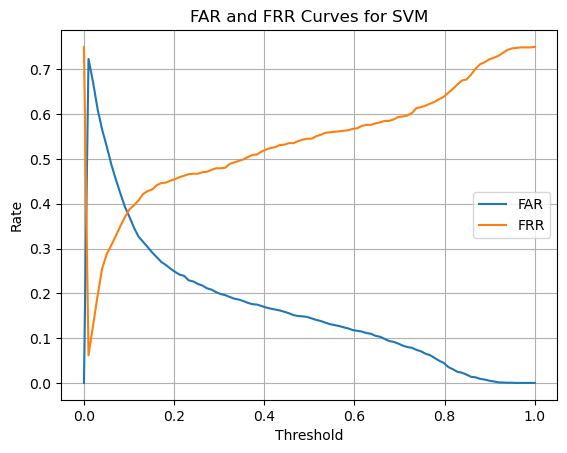

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

probabilities = clf.predict_proba(X_test)

# Function to compute FAR and FRR
def compute_far_frr(y_true, probabilities, threshold, class_index):
    y_pred = (probabilities[:, class_index] > threshold).astype(int)
    conf_mat = confusion_matrix(y_true, y_pred)

    fp = conf_mat.sum(axis=0)[1] - np.diag(conf_mat)[1]
    tn = conf_mat.sum() - conf_mat.sum(axis=0)[1] - conf_mat.sum(axis=1)[1] + np.diag(conf_mat)[1]
    fn = conf_mat.sum(axis=1)[1] - np.diag(conf_mat)[1]
    tp = np.diag(conf_mat)[1]
    far = fp / (fp + tn)
    frr = fn / (fn + tp)
    return far, frr

# Compute FAR and FRR for different thresholds
thresholds = np.linspace(0, 1, 100)
far_list = []
frr_list = []

for threshold in thresholds:
    far_sum = 0
    frr_sum = 0
    for class_index in range(3):
        far, frr = compute_far_frr(testlabels, probabilities, threshold, class_index)
        far_sum += far
        frr_sum += frr
    far_list.append(far_sum / 4)
    frr_list.append(frr_sum / 4)

# Plot FAR and FRR curves
plt.plot(thresholds, far_list, label='FAR')
plt.plot(thresholds, frr_list, label='FRR')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FAR and FRR Curves for SVM')
plt.legend()
plt.grid(True)
plt.show()


# Classification report

In [57]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(testlabels, y_pred))
error = 1 - accuracy_score(testlabels, y_pred)
print("Error: {:.2f}%".format(error * 100))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.84      0.66      0.74       227
         2.0       0.89      0.80      0.84       230
         3.0       0.65      0.84      0.73       173
         4.0       0.65      0.71      0.68       203

    accuracy                           0.75       833
   macro avg       0.76      0.75      0.75       833
weighted avg       0.77      0.75      0.75       833

Error: 25.09%


# Batch Size Comparison

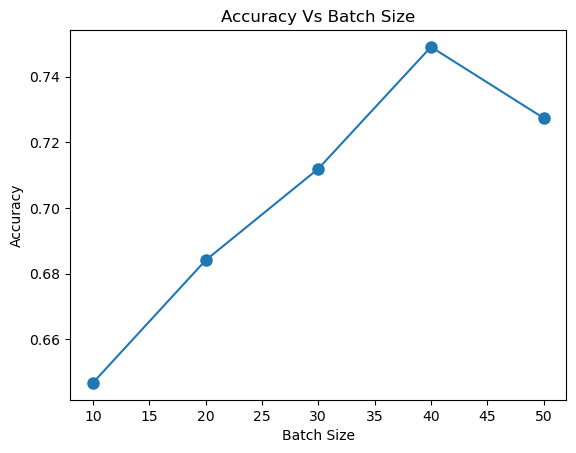

In [49]:
import matplotlib.pyplot as plt

# Sample data
x = [10, 20, 30, 40, 50]
y = [0.6467065868263473, 0.684052757793765, 0.711971197119712, 0.7490996398559424, 0.7274096385542169]

# Plotting the line graph
plt.plot(x, y, marker='o', markersize=8)

# Adding labels and title
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Batch Size')

# Displaying the plot
plt.show()

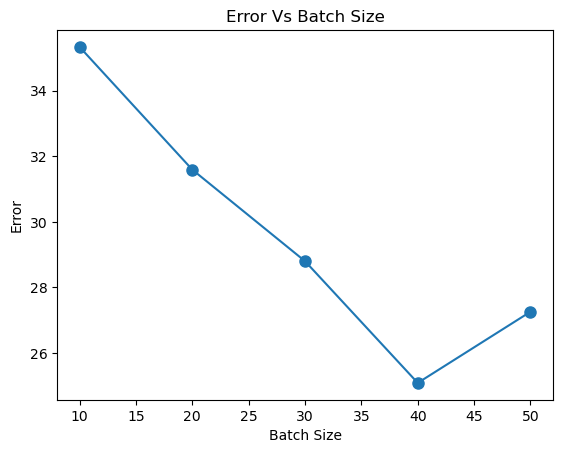

In [50]:
import matplotlib.pyplot as plt

# Sample data
x = [10, 20, 30, 40, 50]
y = [35.33, 31.59,28.80, 25.09, 27.26]

# Plotting the line graph
plt.plot(x, y, marker='o', markersize=8)

# Adding labels and title
plt.xlabel('Batch Size')
plt.ylabel('Error')
plt.title('Error Vs Batch Size')

# Displaying the plot
plt.show()